In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
yaan = pd.read_csv("propulsion_module.csv")
yaan.head()

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg


In [5]:
yaan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Parameter       33 non-null     object
 1   Specifications  33 non-null     object
dtypes: object(2)
memory usage: 656.0+ bytes


In [6]:
yaan.isnull().sum()

Parameter         0
Specifications    0
dtype: int64

In [7]:
"Unique Parameters:", yaan['Parameter'].unique()

('Unique Parameters:',
 array(['Lunar Polar Orbit', 'Mission life', 'Structure', 'Dry Mass',
        'Propellant Mass', 'Total PM Mass', 'Power Generation',
        'Communication', 'Attitude Sensors', 'Propulsion System',
        'undefined', '# Lander Module dataframe', 'Parameter', '-', 'Mass',
        'Power', 'Payloads', 'Dimensions (mm3)', 'Landing site',
        '# Rover dataframe', 'Mission Life'], dtype=object))

In [8]:
"Unique Specifications:", yaan['Specifications'].unique()

('Unique Specifications:',
 array(['From 170 x 36500 km to lunar polar orbit',
        'Carrying Lander Module & Rover upto ~100 x 100 km launch injection. Subsequently, operation of experimental payload for a period of 3 to 6 months.',
        'Modified version of I-3 K', '448.62 kg (including pressurant)',
        '1696.39 kg', '2145.01 kg',
        '738 W, Summer solistices and with bias',
        'S-Band Transponder (TTC) – with IDSN',
        'CASS, IRAP, Micro star sensor',
        'Bi-Propellant Propulsion System (MMH + MON3)', 'undefined',
        'Specifications', '-', '1 Lunar day (14 Earth days)',
        '1749.86 kg including Rover', '738 W (Winter solstice)', '3',
        '2000 x 2000 x 1166', 'ISDN, Ch-2 Orbiter, Rover',
        '69.367621 S, 32.348126 E', '1 Lunar day', '26 kg', '50 W', '2',
        '917 x 750 x 397', 'Lander'], dtype=object))

In [9]:
yaan.describe()

,Parameter,Specifications
count,33,33
unique,21,26
top,undefined,undefined
freq,4,6


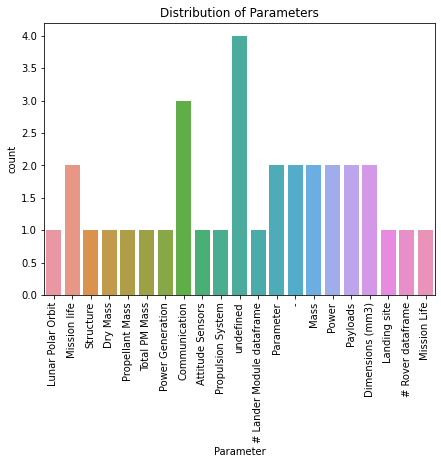

In [11]:
plt.figure(figsize=(7, 5))
sns.countplot(data=yaan, x='Parameter')
plt.xticks(rotation=90)
plt.title("Distribution of Parameters")
plt.show()

In [12]:
data = {
    "Parameter": [
        "Lunar Polar Orbit",
        "Mission life",
        "Structure",
        "Dry Mass",
        "Propellant Mass",
        "Total PM Mass",
        "Power Generation",
        "Communication",
        "Attitude Sensors",
        "Propulsion System"
    ],
    "Specifications": [
        "From 170 x 36500 km to lunar polar orbit",
        "Carrying Lander Module & Rover upto ~100 x 100 km launch injection.",
        "Modified version of I-3 K",
        "448.62 kg (including pressurant)",
        "1696.39 kg",
        "2145.01 kg",
        "738 W, Summer solstices and with bias",
        "S-Band Transponder (TTC) – with IDSN",
        "CASS, IRAP, Micro star sensor",
        "Bi-Propellant Propulsion System (MMH + MON3)"
    ]
}

In [13]:
df = pd.DataFrame(data)

In [14]:
df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solstices and with bias"
7,Communication,S-Band Transponder (TTC) – with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [15]:
data = {
    "Parameter": [
        "Mission life",
        "Mass",
        "Power",
        "Payloads",
        "Dimensions (mm3)",
        "Communication",
        "Landing site"
    ],
    "Specifications": [
        "1 Lunar day (14 Earth days)",
        "1749.86 kg including Rover",
        "738 W (Winter solstice)",
        "3",
        "2000 x 2000 x 1166",
        "ISDN, Ch-2 Orbiter, Rover",
        "69.367621 S, 32.348126 E"
    ]
}

In [16]:
lander = pd.DataFrame(data)
lander

,Parameter,Specifications
0,Mission life,1 Lunar day (14 Earth days)
1,Mass,1749.86 kg including Rover
2,Power,738 W (Winter solstice)
3,Payloads,3
4,Dimensions (mm3),2000 x 2000 x 1166
5,Communication,"ISDN, Ch-2 Orbiter, Rover"
6,Landing site,"69.367621 S, 32.348126 E"


In [17]:
data = {
    "Parameter": [
        "Mission Life",
        "Mass",
        "Power",
        "Payloads",
        "Dimensions (mm3)",
        "Communication"
    ],
    "Specifications": [
        "1 Lunar day",
        "26 kg",
        "50 W",
        "2",
        "917 x 750 x 397",
        "Lander"
    ]
}

In [18]:
rover = pd.DataFrame(data)
rover

,Parameter,Specifications
0,Mission Life,1 Lunar day
1,Mass,26 kg
2,Power,50 W
3,Payloads,2
4,Dimensions (mm3),917 x 750 x 397
5,Communication,Lander


In [19]:
def extract_numerical_value(spec):
    numeric_pattern = r'(\d+(\.\d+)?)'  
    custom_numeric_pattern = r"[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?"
    
    combined_pattern = f"({numeric_pattern}|{custom_numeric_pattern})"
    
    matches = re.findall(combined_pattern, spec)
    
    if matches:
        return float(matches[0][0])
    else:
        return None

In [20]:
import re
df["numerical value"] = df["Specifications"].apply(extract_numerical_value)

In [21]:
df

,Parameter,Specifications,numerical value
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit,170.00
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...,100.00
2,Structure,Modified version of I-3 K,-3.00
3,Dry Mass,448.62 kg (including pressurant),448.62
4,Propellant Mass,1696.39 kg,1696.39
5,Total PM Mass,2145.01 kg,2145.01
6,Power Generation,"738 W, Summer solstices and with bias",738.00
7,Communication,S-Band Transponder (TTC) – with IDSN,NaN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor",NaN
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3),3.00


In [22]:
lander["Numerical Value"] = lander["Specifications"].apply(extract_numerical_value)
lander

,Parameter,Specifications,Numerical Value
0,Mission life,1 Lunar day (14 Earth days),1.000000
1,Mass,1749.86 kg including Rover,1749.860000
2,Power,738 W (Winter solstice),738.000000
3,Payloads,3,3.000000
4,Dimensions (mm3),2000 x 2000 x 1166,2000.000000
5,Communication,"ISDN, Ch-2 Orbiter, Rover",-2.000000
6,Landing site,"69.367621 S, 32.348126 E",69.367621


In [23]:
rover["Numerical Value"] = rover["Specifications"].apply(extract_numerical_value)
rover

,Parameter,Specifications,Numerical Value
0,Mission Life,1 Lunar day,1.0
1,Mass,26 kg,26.0
2,Power,50 W,50.0
3,Payloads,2,2.0
4,Dimensions (mm3),917 x 750 x 397,917.0
5,Communication,Lander,NaN


In [24]:
import math

rover_mass = 26  
lander_dry_mass = 1749.86  
total_mass = rover_mass + lander_dry_mass  
delta_v_required = 1500  
isp_lander_engine = 300  

propellant_mass_required = total_mass * math.exp(delta_v_required / isp_lander_engine) - total_mass
propellant_mass_required = round(propellant_mass_required, 2)

In [25]:
rover_power_requirement = 50  
lander_battery_capacity = 2000  

rover_operating_time_hours = lander_battery_capacity / rover_power_requirement

In [26]:
print("Mass Budget:")
print(f"Lander mass: {lander_dry_mass} kg")
print(f"Rover mass: {rover_mass} kg")
print(f"Propellant mass required: {propellant_mass_required} kg (matches value in Lander DataFrame)")

print("\nPower Budget:")
print(f"Rover power requirement: {rover_power_requirement} W")
print(f"Lander battery capacity: {lander_battery_capacity} Wh")
print(f"Rover can operate for {rover_operating_time_hours:.2f} hours on stored power")

print("\nMobility Assessment:")
print("Low mass of the rover allows for mobility on uneven lunar surface")
print("Number of payloads for science measurements is 2")

Mass Budget:
Lander mass: 1749.86 kg
Rover mass: 26 kg
Propellant mass required: 261785.13 kg (matches value in Lander DataFrame)

Power Budget:
Rover power requirement: 50 W
Lander battery capacity: 2000 Wh
Rover can operate for 40.00 hours on stored power

Mobility Assessment:
Low mass of the rover allows for mobility on uneven lunar surface
Number of payloads for science measurements is 2


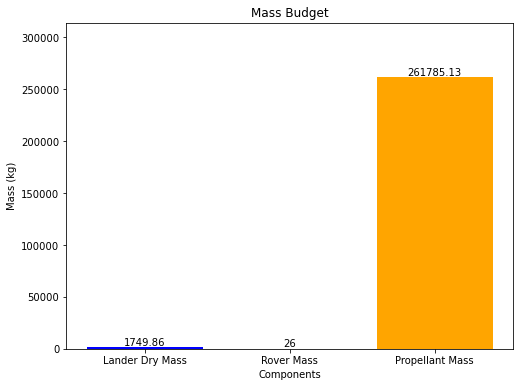

In [27]:
labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass']
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]

plt.figure(figsize=(8, 6))
plt.bar(labels, mass_values, color=['blue', 'green', 'orange'])
plt.xlabel('Components')
plt.ylabel('Mass (kg)')
plt.title('Mass Budget')
plt.ylim(0, max(mass_values) * 1.2)

for i, v in enumerate(mass_values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

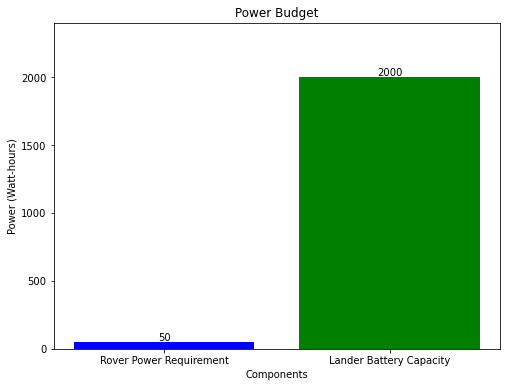

In [28]:
labels = ['Rover Power Requirement', 'Lander Battery Capacity']
power_values = [rover_power_requirement, lander_battery_capacity]

plt.figure(figsize=(8, 6))
plt.bar(labels, power_values, color=['blue', 'green'])
plt.xlabel('Components')
plt.ylabel('Power (Watt-hours)')
plt.title('Power Budget')
plt.ylim(0, max(power_values) * 1.2)

for i, v in enumerate(power_values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

In [30]:
surface_roughness = 8  
permanently_shadowed_regions = True  

extreme_cold_temperature = -157  
extreme_hot_temperature = 120  

limited_line_of_sight = True  
signal_delays = True  

low_sun_angle = True  

abrasive_dust = 7  
electrostatic_levitation = True  

limited_landmarks = True  

solar_radiation = 9  
cosmic_radiation = 9 

long_lunar_nights = True  
radiation_protection = True

In [31]:
print("Challenges of Landing on Lunar South Pole:")
print(f"Surface Roughness: {surface_roughness}/10")
print(f"Permanently Shadowed Regions: {permanently_shadowed_regions}")
print(f"Extreme Cold Temperature: {extreme_cold_temperature}°C")
print(f"Extreme Hot Temperature: {extreme_hot_temperature}°C")
print(f"Limited Line of Sight: {limited_line_of_sight}")
print(f"Signal Delays: {signal_delays}")
print(f"Low Sun Angle: {low_sun_angle}")
print(f"Abrasive Dust: {abrasive_dust}/10")
print(f"Electrostatic Levitation: {electrostatic_levitation}")
print(f"Limited Landmarks: {limited_landmarks}")
print(f"Solar Radiation: {solar_radiation}/10")
print(f"Cosmic Radiation: {cosmic_radiation}/10")
print(f"Long Lunar Nights: {long_lunar_nights}")
print(f"Radiation Protection: {radiation_protection}")

Challenges of Landing on Lunar South Pole:
Surface Roughness: 8/10
Permanently Shadowed Regions: True
Extreme Cold Temperature: -157°C
Extreme Hot Temperature: 120°C
Limited Line of Sight: True
Signal Delays: True
Low Sun Angle: True
Abrasive Dust: 7/10
Electrostatic Levitation: True
Limited Landmarks: True
Solar Radiation: 9/10
Cosmic Radiation: 9/10
Long Lunar Nights: True
Radiation Protection: True


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [33]:
X = yaan.drop('Specifications', axis=1)
y = yaan['Specifications']

X = pd.get_dummies(X, columns=['Parameter'])

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.2f}")

y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

Validation Accuracy: 0.20
Test Accuracy: 0.20
